In [45]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.preprocessing import minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [16]:
boston = load_boston()
X = boston.data
y = boston.target
feature_names = list(boston.feature_names) + ['TARGET']

In [33]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [30]:
df = pd.DataFrame(np.concatenate((X, y.reshape(-1,1)), axis=1), columns=feature_names)

In [31]:
display(df.head())
display(df.describe())
display(df.corr().loc[['TARGET']])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040322,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806
std,0.096626,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200000
75%,0.040925,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.385832,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


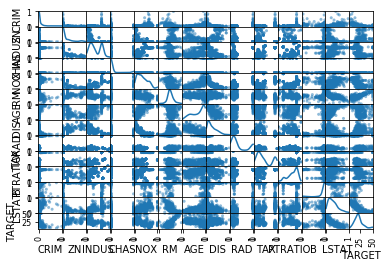

In [32]:
scatter_matrix(df, diagonal='kde')
plt.show()

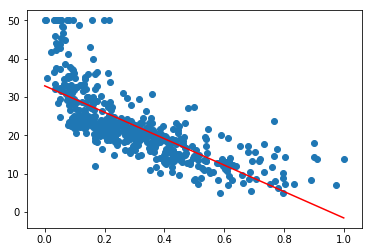

In [44]:
x_s = df['LSTAT'].values.reshape(-1,1)
y_s = df['TARGET'].values
linear_estimator = LinearRegression()
linear_estimator.fit(x_s, y_s)
x_axis = np.linspace(x_s.min(), x_s.max(), 100).reshape(-1,1)
y_axis = linear_estimator.predict(x_axis)
plt.scatter(x_s.reshape(-1), y_s)
plt.plot(x_axis, y_axis, c='red')
plt.show()

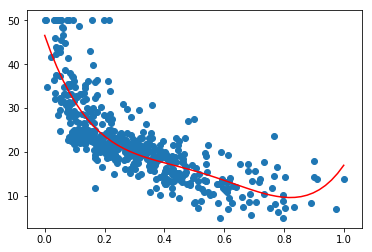

In [59]:
x_s = df['LSTAT'].values.reshape(-1,1)
y_s = df['TARGET'].values
steps = [
    ('poly', PolynomialFeatures(degree=4)),
    ('estimator', LinearRegression())
]
pipe = Pipeline(steps)
pipe.fit(x_s, y_s)
x_axis = np.linspace(x_s.min(), x_s.max()).reshape(-1,1)
y_axis = pipe.predict(x_axis)
plt.scatter(x_s.reshape(-1), y_s)
plt.plot(x_axis, y_axis, c='red')
plt.show()

In [78]:
%%html
<h1>Introduction to Regression Spline</h1>
<a href='https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/' target='_blank'>Link Article<a/>

In [73]:
simple_df = df[['LSTAT', 'TARGET']]
simple_df.head()
df_cuts, bins = pd.cut(simple_df['LSTAT'], bins=4, retbins=True, right=True)
df_cuts.value_counts(sort=False)

(-0.001, 0.25]    243
(0.25, 0.5]       187
(0.5, 0.75]        57
(0.75, 1.0]        19
Name: LSTAT, dtype: int64

In [81]:
df_steps = pd.concat([simple_df['LSTAT'], df_cuts, simple_df['TARGET']], keys=['LSTAT', 'LSTAT_CUT', 'TARGET'], axis=1)
df_steps.head(10)

,LSTAT,LSTAT_CUT,TARGET
0,0.089680,"(-0.001, 0.25]",24.0
1,0.204470,"(-0.001, 0.25]",21.6
2,0.063466,"(-0.001, 0.25]",34.7
3,0.033389,"(-0.001, 0.25]",33.4
4,0.099338,"(-0.001, 0.25]",36.2
5,0.096026,"(-0.001, 0.25]",28.7
6,0.295254,"(0.25, 0.5]",22.9
7,0.480684,"(0.25, 0.5]",27.1
8,0.778146,"(0.75, 1.0]",16.5
9,0.424117,"(0.25, 0.5]",18.9


In [85]:
df_steps_dumies = pd.get_dummies(df_cuts)
df_steps_dumies.head()

,"(-0.001, 0.25]","(0.25, 0.5]","(0.5, 0.75]","(0.75, 1.0]"
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
